## Toxic Comment Classification Challenge 
### Identify and classify toxic online comments

## Note:

### If you want to  run code Please Run code in kaggle Notebook

## Team : 
### 1. Omar Ahmed Mohamed Ahmed 
### 2. Asmaa Saeed 
### 3. Mohamed Salama 
### 4. Alaa Elawady 
### 5. Fatema Samir

### Import Libaraies

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [ ]:
import zipfile
z= zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
z.extractall()

z= zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
z.extractall()

z= zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip')
z.extractall()

In [ ]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Embedding
from keras.layers import LSTM

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import unicodedata
import html
from sklearn.model_selection import train_test_split
stop_words = stopwords.words('english')


### Import Data 

In [ ]:
training_data = pd.read_csv("train.csv")

In [ ]:
training_data.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


## Data Analysis


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
training_data.shape

(159571, 8)

In [ ]:
training_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking for any null values
training_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
training_data = training_data.drop(['id'],axis = 1)

In [ ]:
training_data.duplicated().sum()

0

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


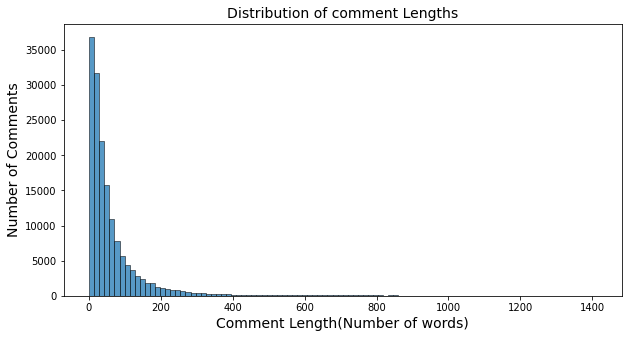

In [ ]:
# Length of the comments
comment_lengths = [len(comment.split()) for comment in training_data["comment_text"]]
# plot the distribution of tweet lengths
plt.figure(figsize=(10,5))
sns.histplot(comment_lengths, bins=100);
plt.xlabel("Comment Length(Number of words)", fontsize=14);
plt.ylabel("Number of Comments", fontsize=14);
plt.title("Distribution of comment Lengths", fontsize=14);


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comment_text'>

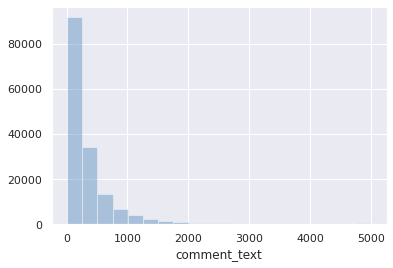

In [ ]:
# Below is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words
sns.set(color_codes=True)
comment_len = training_data.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [ ]:
training_data["comment_text"].sample(20)

31276     Fellow, user. Can karma your ovaries.Users. Br...
12772     Box added, copying Banksia prionotes. I couldn...
115144    Honestly, Olaf, the POV fork argument just doe...
155760            the entire human race is quite impressive
66781     "\nRe: C.J. Griffin. Correct. However, your st...
122515    Why is it the BillCJ insists on screwing aroun...
125199         You should know how to wp:agf. For tildes...
15131     Contested deletion \n\nThis article should not...
25991     :Cuesight\nA tag has been placed on Cuesight, ...
138827    Thank you for that reference, I think it's ass...
155370    Shut up! \n\nFor fuck sake I haven't edited an...
29060     Please refrain from repeatedly undoing other p...
141870    "\n\nYou know what, forget it. The guy who was...
104691    Read well waht I write \n\nThis is a very deli...
93958     But in a way, this is good.\nWhenever anyone q...
8365      ", 31 March 2011 (UTC)\n\n See you jackasses a...
137225    After Causteau and Cadenas2008

In [ ]:
# Subsetting labels from the training data
train_labels = training_data[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]

#### We can see that most of the comments have the tweet lengths around 200 words. Few comments have very high length. We can further see the distribution of the comment lengths by each labels.

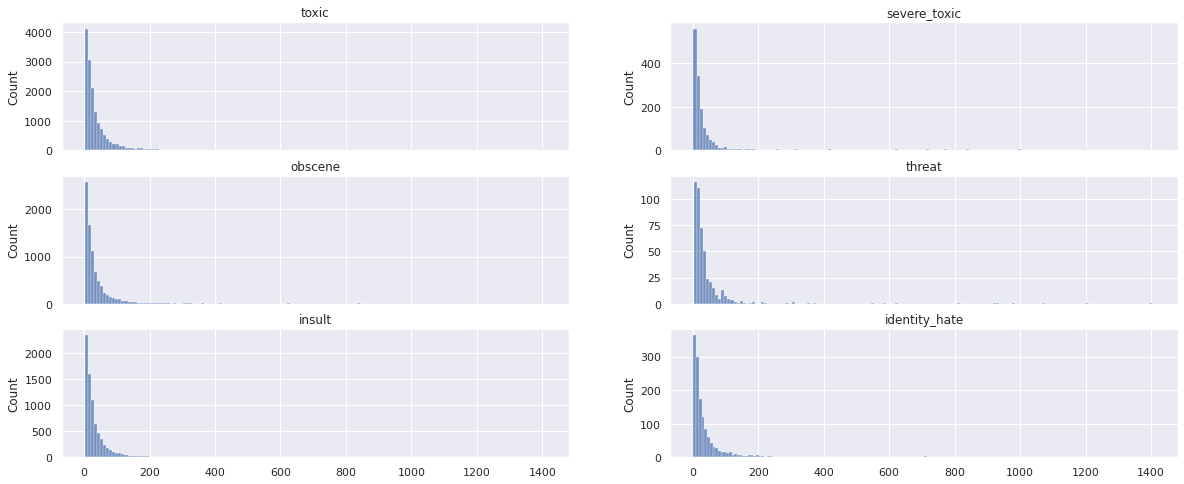

In [ ]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
fig, ax = plt.subplots(3, 2, figsize=(20,8), sharex=True)
axes =ax.ravel()
for i in range(6):
  comments = training_data.loc[training_data[labels[i]] == 1, :]
  comment_len = [len(comment.split()) for comment in comments["comment_text"]]
  sns.histplot(comment_len, ax=axes[i], bins = 150);
  axes[i].title.set_text(labels[i]);

### Distribution of Labels


##### Since this is a multi label classification task, each comment can have more than one label. Here, we will see number of comments belonging to a label. Also, we will see if comments are not classified to any labels.

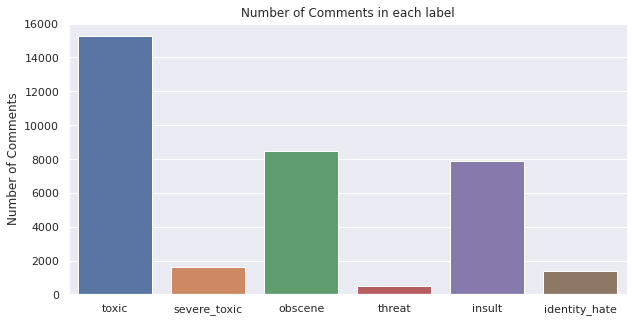

In [ ]:
# Number of tweets in each labels
labels_count = training_data[labels].sum()
plt.figure(figsize = (10,5))
sns.barplot(x = labels_count.index,y = labels_count.values);
plt.title("Number of Comments in each label");
plt.ylabel("Number of Comments");

##### As we see, there are higher number of comments belonging to toxic labels, and comments in sever_toxic, threat and identity_hate are low. So, here we have the problem of imbalanced data and therfore we will have to be careful in selecting the correct evaluation metric later.

In [ ]:
multilabel_count = training_data[labels].sum(axis = 1).value_counts()
multilabel_count

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

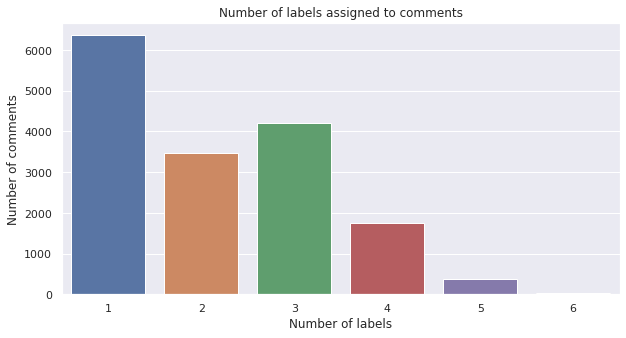

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = multilabel_count.iloc[1:].index, y = multilabel_count.iloc[1:].values);
plt.title("Number of labels assigned to comments");
plt.xlabel("Number of labels", fontsize=12);
plt.ylabel("Number of comments",fontsize=12);

In [ ]:
print(f'Number of comments with no any labels(clean tweet): {multilabel_count.iloc[0]}')
print(f'Percentage of comments with no any labels: {round(multilabel_count.iloc[0]/len(training_data) * 100,3)}%')

Number of comments with no any labels(clean tweet): 143346
Percentage of comments with no any labels: 89.832%


### Correlation between the target labels


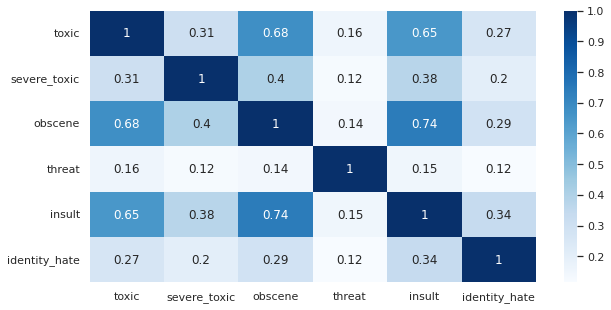

In [ ]:
labels_cor = training_data[labels].corr()
plt.figure(figsize=(10,5))
sns.heatmap(labels_cor, annot=True, cmap='Blues');

### Cleaning and Preprocessing

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def normalize_text(text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
training_data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
normalize_text(training_data['comment_text'][0])

'explanation edit make username hardcore metallica fan revert werent vandalism closure gas vote new york doll fac please dont remove template talk page since im retire'

In [ ]:
training_data['comment_text'] = training_data['comment_text'].apply(normalize_text)

In [ ]:
 df_labels = training_data.iloc[:,1:]

In [ ]:
df_labels.shape

(159571, 6)

In [ ]:
df_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
partial_x = training_data[:120000]
partial_y =  df_labels[:120000]

In [ ]:
partial_x.shape

(120000, 7)

In [ ]:
partial_y.shape

(120000, 6)

### Spliting Data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(partial_x['comment_text'], partial_y, test_size = 0.2, random_state = 42, shuffle=True)


In [ ]:
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)

(96000,)
(24000, 6)
(96000, 6)
(24000,)


### Tokenize words for BOW

In [ ]:
vocab_sz = 5000
tokenizer = Tokenizer(num_words=vocab_sz ,oov_token="oov")
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_matrix(X_train)
tokenized_test = tokenizer.texts_to_matrix(X_test)

print(tokenized_train.shape)
print(y_train.shape)
print(tokenized_test.shape)
print(y_test.shape)

(96000, 5000)
(96000, 6)
(24000, 5000)
(24000, 6)


In [ ]:
tokenized_train[0:20]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
tokenized_test[0:2]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### Modelling

In [ ]:
model = Sequential()

model.add(Dense(512, activation = 'relu', input_shape = (vocab_sz,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(6, activation='sigmoid'))

model.summary()

2022-07-09 20:12:52.866014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 20:12:52.989650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 20:12:52.990401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 20:12:52.991620: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560512   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 2,626,950
Trainable params: 2,626,950
Non-trainable params: 0
_________________________________________________________________


ead from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 20:12:55.294637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15403 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
model.compile(optimizer='RMSProp',loss = 'binary_crossentropy',metrics=['AUC'])

In [ ]:
batch_size = 128
epochs = 8

history = model.fit(tokenized_train, y_train,
          batch_size=batch_size,
          epochs=epochs,          
          validation_data=(tokenized_test, y_test)
        )

2022-07-09 20:12:56.743028: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1920000000 exceeds 10% of free system memory.
2022-07-09 20:12:58.662855: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1920000000 exceeds 10% of free system memory.
2022-07-09 20:13:00.046350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8
750/750 [==============================] - 7s 7ms/step - loss: 0.0767 - auc: 0.9449 - val_loss: 0.0616 - val_auc: 0.9607
Epoch 2/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0553 - auc: 0.9695 - val_loss: 0.1039 - val_auc: 0.9568
Epoch 3/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0476 - auc: 0.9792 - val_loss: 0.0937 - val_auc: 0.9488
Epoch 4/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0411 - auc: 0.9845 - val_loss: 0.0637 - val_auc: 0.9556
Epoch 5/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0352 - auc: 0.9892 - val_loss: 0.0613 - val_auc: 0.9614
Epoch 6/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0299 - auc: 0.9915 - val_loss: 0.0682 - val_auc: 0.9525
Epoch 7/8
750/750 [==============================] - 3s 5ms/step - loss: 0.0249 - auc: 0.9936 - val_loss: 0.0704 - val_auc: 0.9545
Epoch 8/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0205 - a

## LSTM

In [ ]:
tokenizer_seq_train = tokenizer.texts_to_sequences(X_train)
tokenized_seq_test = tokenizer.texts_to_sequences(X_test)
tokenizer_seq_train = pad_sequences(tokenizer_seq_train, maxlen=25, padding='post',truncating='post')
tokenized_seq_test = pad_sequences(tokenized_seq_test, maxlen=25, padding='post', truncating='post')


In [ ]:
model_lstm = models.Sequential()
model_lstm.add(layers.Embedding(len(tokenizer.word_index),128))
model_lstm.add(layers.LSTM(64))
model_lstm.add(layers.Dense(6, activation='sigmoid'))

In [ ]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         18295680  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 18,345,478
Trainable params: 18,345,478
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.fit(tokenizer_seq_train,y_train,epochs=5,validation_data=(tokenized_seq_test,y_test))

Epoch 1/5


2022-07-09 20:13:47.770635: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3000/3000 [==============================] - 30s 9ms/step - loss: 0.0967 - auc: 0.9095 - val_loss: 0.0578 - val_auc: 0.9711
Epoch 2/5
3000/3000 [==============================] - 27s 9ms/step - loss: 0.0552 - auc: 0.9728 - val_loss: 0.0548 - val_auc: 0.9734
Epoch 3/5
3000/3000 [==============================] - 26s 9ms/step - loss: 0.0501 - auc: 0.9791 - val_loss: 0.0552 - val_auc: 0.9715
Epoch 4/5
3000/3000 [==============================] - 27s 9ms/step - loss: 0.0451 - auc: 0.9839 - val_loss: 0.0562 - val_auc: 0.9702
Epoch 5/5
3000/3000 [==============================] - 27s 9ms/step - loss: 0.0407 - auc: 0.9870 - val_loss: 0.0583 - val_auc: 0.9603


## Bidirectional

In [ ]:
model_lstm = models.Sequential()
model_lstm.add(layers.Embedding(len(tokenizer.word_index),128))
model_lstm.add(layers.Dropout(0.2))
model_lstm.add(layers.Bidirectional(layers.LSTM(64)))
model_lstm.add(layers.Dense(6, activation='sigmoid'))

In [ ]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_lstm.fit(tokenizer_seq_train,y_train,epochs=5,validation_data=(tokenized_seq_test,y_test))

Epoch 1/5
3000/3000 [==============================] - 35s 11ms/step - loss: 0.0727 - auc: 0.9529 - val_loss: 0.0581 - val_auc: 0.9756
Epoch 2/5
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0530 - auc: 0.9758 - val_loss: 0.0530 - val_auc: 0.9720
Epoch 3/5
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0478 - auc: 0.9808 - val_loss: 0.0535 - val_auc: 0.9683
Epoch 4/5
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0431 - auc: 0.9855 - val_loss: 0.0550 - val_auc: 0.9659
Epoch 5/5
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0388 - auc: 0.9884 - val_loss: 0.0587 - val_auc: 0.9575


## GRU

In [ ]:
model_gru = models.Sequential()
model_gru.add(layers.Embedding(len(tokenizer.word_index),128))
model_gru.add(layers.Dropout(0.2))
model_gru.add(layers.Bidirectional(layers.GRU(128,return_sequences=True)))
model_gru.add(layers.Dropout(0.2))
model_gru.add(layers.Bidirectional(layers.GRU(64)))
model_gru.add(layers.Dense(6, activation='sigmoid'))

In [ ]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_gru.fit(tokenizer_seq_train,y_train,epochs=6,validation_data=(tokenized_seq_test,y_test))

Epoch 1/6
3000/3000 [==============================] - 46s 14ms/step - loss: 0.0653 - auc: 0.9613 - val_loss: 0.0535 - val_auc: 0.9760
Epoch 2/6
3000/3000 [==============================] - 41s 14ms/step - loss: 0.0511 - auc: 0.9770 - val_loss: 0.0520 - val_auc: 0.9733
Epoch 3/6
3000/3000 [==============================] - 41s 14ms/step - loss: 0.0456 - auc: 0.9822 - val_loss: 0.0553 - val_auc: 0.9630
Epoch 4/6
3000/3000 [==============================] - 42s 14ms/step - loss: 0.0407 - auc: 0.9865 - val_loss: 0.0539 - val_auc: 0.9694
Epoch 5/6
3000/3000 [==============================] - 41s 14ms/step - loss: 0.0363 - auc: 0.9896 - val_loss: 0.0582 - val_auc: 0.9614
Epoch 6/6
3000/3000 [==============================] - 41s 14ms/step - loss: 0.0321 - auc: 0.9915 - val_loss: 0.0650 - val_auc: 0.9473
